# (2) Least squares fit and linear regression

## MPI FKF study group

After having a look at our data in the previous notebook and identifying correlating data, we can fit models and extract fitting parameters that hopefully tell us something about physical or chemical relationships.

To get a feeling for least square fits in python, we can create data that roughly follows $y = a*X+b$, and to mimic the real world we add some noise. $X$ is the independent variable with its values written in a *numpy* array. [*numpy*](https://numpy.org/) is a python library for scientific computing and quite usefull when dealing with arrays.
The dependent variable $y$ is calculated for each data point $X_i$.

Noise is added using **random.normal()** from *numpy*.

The data can be plotted using the *matplotlib* library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 2
b = 5

#linspace generates an array with equally spaced entries in a given interval.
#Here the interval starts at int_start, ends at int_end, and has n_points entries.

int_start = -20
int_end = 20
n_points = 100

X = np.linspace(int_start,int_end,n_points)
y = a*X + b

#random.normal draws random numbers from a normal distribution.
#The center of the distribution (mean) is at mu, the standard deviation is sigma.

mu, sigma = 0, 3

noise = np.random.normal(mu, sigma, X.shape)
X = X + noise

#plotting y vs. X

plt.plot(X,y, 'o')
plt.xlabel('X')  
plt.ylabel('y') 
plt.show()

<Figure size 640x480 with 1 Axes>

The *numpy* package offers a function linalg.lstsq() for calculating the least-squares solution to the equation $a*x = y$, see [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html), i.e. fitting a straight line to a data set.

The equation to be fitted $a\text{_fit}*X + b\text{_fit} = y$ can be rewritten as $y = A*p$ with $A = [[x \: 1]]$ and $p = [[a\text{_fit}], [b\text{_fit}]]$. 
What is going on here is that to each of the 100 data points in the array X, with entries $x_i, i=0,..,100$, we make a row vector, $[x_i, 1]$ and multiply this with the column vector $p$. This calculate the corresponding entries $y_i$ of the array $y$ for each $x_i$.

**numpy.linalg.lstsq** calculates the vector $p$ that minimizes the norm $||y-A*p||^2$

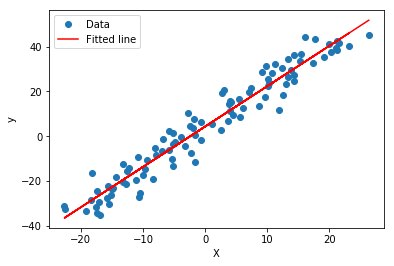

a_fit = 1.801334728225577
b_fit = 4.339150671017812


In [2]:
#make matrix A using np.vstack, which here creates a column vector with X in the 1st row
#and an array with only 1 as entries in the 2nd row.
#Then transpose to get a row vector with X as 1st column and all ones in the second colun. 

A = np.vstack([X, np.ones(len(X))]).T

#use np.linalg.lstsq to calculate the least squares fit

a_fit, b_fit = np.linalg.lstsq(A, y, rcond=None)[0]

plt.plot(X, y, 'o', label='Data', markersize=6)
plt.plot(X, a_fit*X + b_fit, 'r', label='Fitted line')
plt.legend()
plt.xlabel('X')  
plt.ylabel('y')
plt.show()

print("a_fit = " + str(a_fit))
print("b_fit = " + str(b_fit))

We can do the same thing with non-linear data if we adjust the matrix $A$ accordingly to our model. To create a parabolic fit, we substitute $X$ for $X^2$ in $A$. Now we can fit $y = a*x^2 + b$.

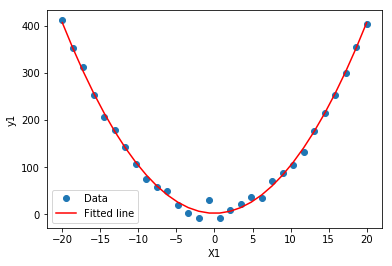

a_fit_1 = 1.009950250799872
b_fit_1 = 2.435222331916351


In [3]:
int_start_1 = -20
int_end_1 = 20
n_points_1 = 30

a1, b1, = 1, 3
mu1, sigma1 = 0, 10

X1 = np.linspace(int_start_1,int_end_1,n_points_1)

noise1 = np.random.normal(mu1, sigma1, X1.shape)

y1 = a1*X1**2 + b1 + noise1

#new A with substituted X^2 for X

A1 = np.vstack([X1**2, np.ones(len(X1))]).T

#same use of np.linalg.lstsq to calculate the least squares fit

a_fit_1, b_fit_1 = np.linalg.lstsq(A1, y1, rcond=None)[0]

#plotting y1 vs. X1

plt.plot(X1, y1, 'o', label='Data', markersize=6)
plt.plot(X1, a_fit_1*X1**2 + b_fit_1, 'r', label='Fitted line')
plt.legend()
plt.xlabel('X1')  
plt.ylabel('y1')
plt.show()

print("a_fit_1 = " + str(a_fit_1))
print("b_fit_1 = " + str(b_fit_1))

Linear regression is probably the most simple starting point in machine learning. I think as physicists we usually fit curves to find the fitting parameters and interpret them having a physical or chemical model in mind. In machine learning, linear regression is mostly about prediction, not necessarily understanding of the data. 

An important python library for machine learning is [**scikit learn**](https://scikit-learn.org/stable/). One often used methods is the *LinearRegression* module, which we can use to fit the linear data from the first example above.

propotinal term: [[1.80133473]]
constant offset: [4.33915067]


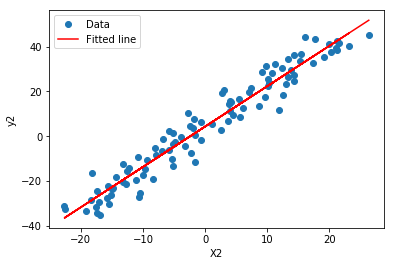

In [4]:
from sklearn.linear_model import LinearRegression

#X,y need to be put into a column vector using the function reshape()

X2 = X.reshape(-1,1)
y2 = y.reshape(-1,1)

#the variable reg includes fit parameters and other parameters from the LinearRegression method called
#on the data X2, y2

reg = LinearRegression().fit(X2, y2)

#The coefficients that we named a_fit and b_fit above are no saved in reg.coef_ and reg.intercept_, respectively

print("propotinal term: " + str(reg.coef_))
print("constant offset: " + str(reg.intercept_))

plt.plot(X2, y2, 'o', label='Data', markersize=6)
plt.plot(X2, reg.coef_*X2 + reg.intercept_, 'r', label='Fitted line')
plt.legend()
plt.xlabel('X2')  
plt.ylabel('y2')
plt.show()

Now we can combine linear regression with some real world data from the last example. We can choose any pair of data with a high correlation and that appear to depend linearly on each other, such as the energy of the lowest unoccupied molecular orbital and the energy gap between highest occupied and lowest unoccupied state. 

The same functions from the last example can be used to load the data. Then the **scikit learn** *LinearRegression* function can be used with the two corresponding entries in the data frame as independent variable $X3$ and dependend variable $y3$.

C:\Users\gutzler\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


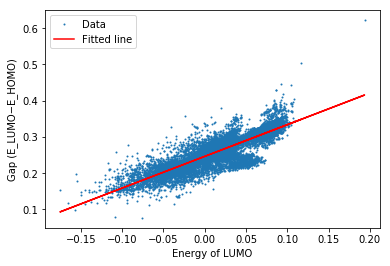

propotinal term: [[0.87479544]]
constant offset: [0.24645261]


In [5]:
import pandas as pd

header_names=["N/A", "ID", "Rotational constant A", "Rotational constant B", "Rotational constant C", 
              "Dipole moment", "Isotropic polarizability", "Energy of HOMO", "Energy of LUMO", 
             "Gap (E_LUMO−E_HOMO)", "Electronic spatial extent", "Zero point vibrational energy", 
             "Internal energy at 0 K", "Internal energy at 298.15 K", "Enthalpy at 298.15 K", 
             "Free energy at 298.15 K", "Heat capacity at 298.15 K"]

df = pd.read_csv('gdb9_features.csv', sep = ', ', header=None, names=header_names)
df = df.drop(["N/A", "ID"], axis=1)

y3 = df["Gap (E_LUMO−E_HOMO)"].values.reshape(-1,1)
X3 = df["Energy of LUMO"].values.reshape(-1,1)

reg3 = LinearRegression().fit(X3, y3)

plt.plot(X3, y3, 'o', label='Data', markersize=1)
plt.plot(X3, reg3.coef_*X3 + reg3.intercept_, 'r', label='Fitted line')
plt.legend()
plt.xlabel("Energy of LUMO")  
plt.ylabel("Gap (E_LUMO−E_HOMO)")
plt.show()

print("propotinal term: " + str(reg3.coef_))
print("constant offset: " + str(reg3.intercept_))

What do we learn from this? The higher the energy gap in the molecule, the lower its electron affinity, i.e. the less likely it is to accept an additonal electron. Probably not surprising for the chemists. 

I also think that although we can fit a linear line, the variance in the data is huge and the predictive power of the model is probably quite low. Maybe we can explore this next week.